In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from kmer_profile_decomposer import KmerProfileModel

In [2]:
df = pd.read_table("tests/data/kmer_profile.tsv", names=("depth", "count"))

In [3]:
model = KmerProfileModel(df['depth'], df['count'], 12, 15, 2000)
result = model.fit(107)

In [4]:
result

_KmerProfileModelFitResult(peaks=12, min_depth=15, max_depth=2000, parameters=_KmerProfileModelParameters(error_dispersion=0.1382788005437073, error_weight=2.6995121773112007, haploid_depth=106.94600328439472, peak_dispersion_bias=1.5398937789201663, peak_weights=[0.03043700336115711, 0.5103032636606998, 0.011705935663490544, 0.0930762456281533, 0.0053519511948737705, 0.02291754084487295, 0.0027827196523075763, 0.007214288137433299, 0.0016834548965449611, 0.0029645520113530843, 0.0009465103777133883, 0.0018531635049286808]))

(0.0, 1.0, 0.0, 1.0)

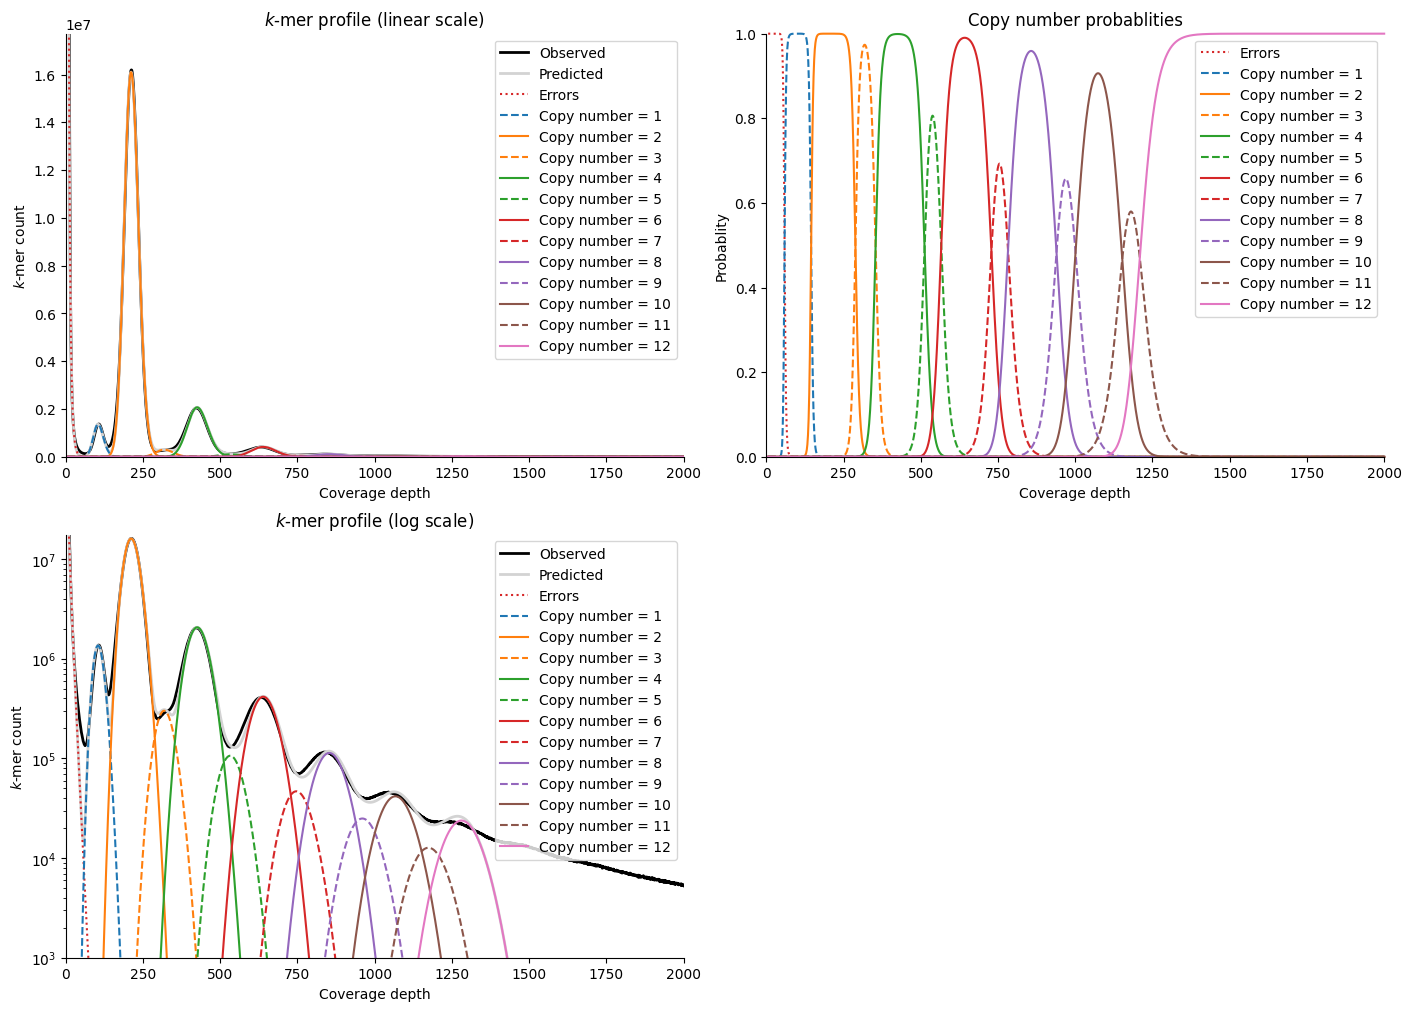

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=False, constrained_layout=True)
result.plot_model(axes[0, 0])
result.plot_model(axes[1, 0], scale='log')
result.plot_probablity(axes[0, 1])
axes[1, 1].axis('off')